In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from feature_engine.selection import RecursiveFeatureElimination
from sklearn.ensemble import GradientBoostingRegressor
from numpy import mean
from numpy import std

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
scaler = MinMaxScaler()

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [8]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

In [174]:
df=pd.read_csv('listings_summary.csv')

In [175]:
df.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

In [11]:
pd.options.display.max_columns = None

In [12]:
df.head()

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,2.018110e+13,43411,none,2217,Ian,18-08-2008,"Key Biscayne, Florida, United States",within an hour,0.96,NaN,t,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,43411,118,42471.0,43401.0,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",NaN,$17.00,NaN,NaN,$0.00,$0.00,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,f,f,flexible,f,f,1,1.42
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",within a day,1.00,NaN,f,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Pankow,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",720.0,$90.00,$520.00,"$1,900.00",$200.00,$50.00,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,NaN,t,f,strict_14_with_grace_period,f,f,1,1.25
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",NaN,NaN,NaN,f,Schöneberg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Schöneberg,Schöneberg-Nord,Tempelhof - Schöneberg,Berlin,Berlin,10777,Berlin,"Berlin, Germany",DE,Germany,52.498855,13.349065,t,Apartment,Private room,2,1.0,1.0,1.0,Pull-out Sofa,"{Internet,Wifi,""Pets allowed"",""Pets live on th...",0.0,$26.00,$175.00,$599.00,$250.00,$30.00,1,$18.00,5,360,4 weeks ago,t,0,0,22,297,43411,25,41498.0,43328.0,88.0,9.0,9.0,9.0,10.0,9.0,9.0,t,NaN,f,f,strict_14_with_grace_period,f,f,1,0.39
4,7071,2.018110e+13,43411,none,17391,Bright,16-05-2009,"Berlin, Berlin, Germany",within an hour,1.00,NaN,t,Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Berlin, Berlin, Germany",Prenzlauer Berg,Helmholtzplatz,Pankow,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.543157,13.415091,t,Apartment,Private ro

In [13]:
df.shape

(22552, 76)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 76 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_response_time                9658 non-null   object 
 9   host_response_rate                9657 non-null   float64
 10  host_acceptance_rate              0 non-null      float64
 11  host_is_superhost                 22526 non-null  object 
 12  host

In [15]:
df['smart_location'].value_counts()

smart_location
Berlin, Germany                                22419
., Germany                                        12
Berlin , Germany                                  12
Schöneberg, Germany                               11
Mitte, Germany                                     8
                                               ...  
Baseler Straße 91 A, 12205 Berlin , Germany        1
Wannsee, Germany                                   1
Berlin, Schöneberg, Germany                        1
Berlin-Wedding, Germany                            1
柏林, Germany                                        1
Name: count, Length: 61, dtype: int64

In [176]:
df_na=df.isna().sum()
df_na[df_na.values > 0 ].sort_values(ascending=False)

host_acceptance_rate           22552
jurisdiction_names             22552
square_feet                    22106
monthly_price                  19893
weekly_price                   18871
host_response_rate             12895
host_response_time             12894
security_deposit                9361
cleaning_fee                    7146
host_neighbourhood              5094
review_scores_value             4435
review_scores_checkin           4432
review_scores_location          4431
review_scores_communication     4418
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_rating            4389
reviews_per_month               3914
first_review                    3914
last_review                     3908
neighbourhood                   1131
zipcode                          656
host_location                    116
state                             84
market                            63
beds                              40
bathrooms                         32
h

In [177]:
df.drop(['host_acceptance_rate', 'jurisdiction_names', 'square_feet', 'monthly_price', 'host_response_rate','host_response_time', 'security_deposit'], axis='columns', inplace=True)

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 69 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   scrape_id                         22552 non-null  float64
 2   last_scraped                      22552 non-null  int64  
 3   experiences_offered               22552 non-null  object 
 4   host_id                           22552 non-null  int64  
 5   host_name                         22526 non-null  object 
 6   host_since                        22526 non-null  object 
 7   host_location                     22436 non-null  object 
 8   host_is_superhost                 22526 non-null  object 
 9   host_neighbourhood                17458 non-null  object 
 10  host_listings_count               22526 non-null  float64
 11  host_total_listings_count         22526 non-null  float64
 12  host

In [179]:
df.describe(include="all")["price"]

count      22552
unique       295
top       $30.00
freq        1387
mean         NaN
std          NaN
min          NaN
25%          NaN
50%          NaN
75%          NaN
max          NaN
Name: price, dtype: object

In [20]:
df.price.unique()

array(['$60.00', '$17.00', '$90.00', '$26.00', '$42.00', '$180.00',
       '$70.00', '$120.00', '$45.00', '$49.00', '$129.00', '$98.00',
       '$160.00', '$65.00', '$197.00', '$130.00', '$100.00', '$44.00',
       '$62.00', '$55.00', '$40.00', '$25.00', '$52.00', '$39.00',
       '$80.00', '$50.00', '$43.00', '$36.00', '$119.00', '$56.00',
       '$48.00', '$88.00', '$200.00', '$37.00', '$102.00', '$29.00',
       '$84.00', '$69.00', '$185.00', '$155.00', '$66.00', '$53.00',
       '$92.00', '$75.00', '$114.00', '$506.00', '$82.00', '$68.00',
       '$125.00', '$89.00', '$59.00', '$96.00', '$31.00', '$81.00',
       '$161.00', '$30.00', '$23.00', '$35.00', '$76.00', '$46.00',
       '$296.00', '$244.00', '$20.00', '$170.00', '$64.00', '$375.00',
       '$32.00', '$86.00', '$79.00', '$38.00', '$74.00', '$195.00',
       '$150.00', '$165.00', '$51.00', '$110.00', '$95.00', '$28.00',
       '$85.00', '$58.00', '$63.00', '$175.00', '$19.00', '$91.00',
       '$93.00', '$72.00', '$33.00', 

In [180]:
df["price"]=df["price"].apply(lambda x: x.replace("$","")) #remove dollar sign
df["price"]=df["price"].apply(lambda x: x.replace(",","")) #remove thousand separator
df["price"]=df["price"].astype("float") #cast the column into type float
df.describe()["price"]

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [68]:
df["price"].value_counts().sort_index()

price
0.0        8
1.0        1
8.0        4
9.0       22
10.0      26
          ..
5000.0     2
6000.0    20
8000.0     1
8600.0     1
9000.0     1
Name: count, Length: 295, dtype: int64

In [69]:
print("0.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 0.5)))
print("1% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 1)))
print("5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 5)))
print("10% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 10)))
print("90% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 90)))
print("95% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 95)))
print("99% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99)))
print("99.5% properties have a price lower than {0: .2f}".format(np.percentile(df["price"], 99.5)))

0.5% properties have a price lower than  13.00
1% properties have a price lower than  15.00
5% properties have a price lower than  20.00
10% properties have a price lower than  24.00
90% properties have a price lower than  100.00
95% properties have a price lower than  140.00
99% properties have a price lower than  270.00
99.5% properties have a price lower than  400.00


In [181]:
df = df[(df.price > 1) & (df.price < 270)]

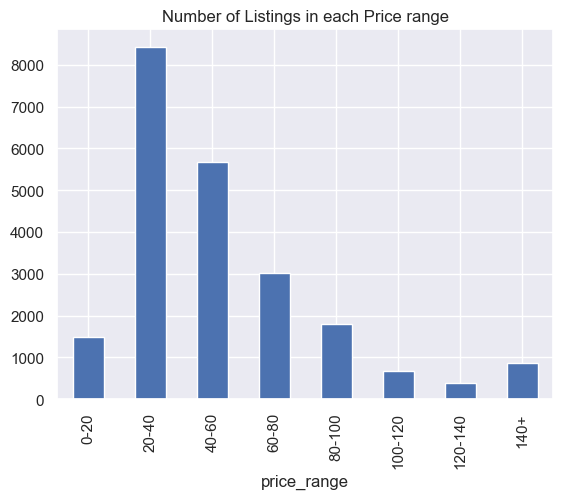

In [183]:
price_range=pd.cut(df["price"], 
                   bins=[0,20,40,60,80,100,120,140, df["price"].max()],
                   labels=["0-20", "20-40", "40-60", "60-80", "80-100", "100-120", "120-140", "140+"])
df["price_range"] = price_range
df["price_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each Price range")
plt.show()

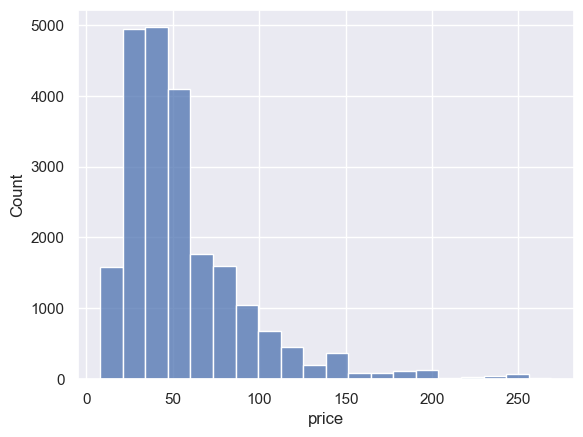

In [35]:
sns.histplot(df['price'], bins=20);

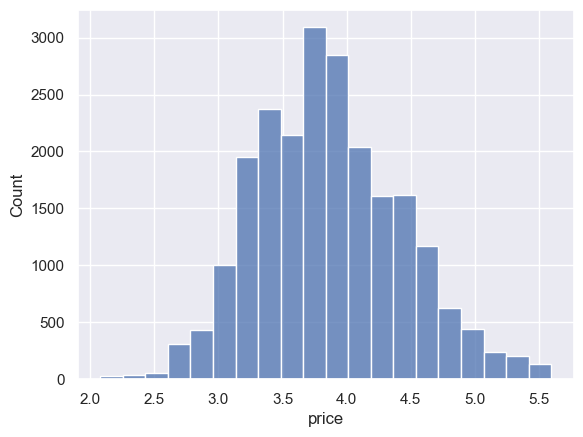

In [36]:
sns.histplot(np.log(df['price']), bins=20);

In [184]:
df.drop(['price_range'], axis='columns', inplace=True)

In [185]:
#replace missing valyes with zero convert cleaning_fee clumn into numeric value
df.cleaning_fee.fillna('$0.00', inplace=True)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',','').astype(float).astype(int)
df.cleaning_fee.isna().sum()

0

In [186]:
np.corrcoef(df.cleaning_fee, df.price)

array([[1.        , 0.40280616],
       [0.40280616, 1.        ]])

In [187]:
df.host_is_superhost.isna().sum()

25

In [76]:
df['host_is_superhost'].value_counts()

host_is_superhost
f    19334
t     2956
Name: count, dtype: int64

In [188]:
df.host_is_superhost.fillna(value='f', inplace=True)
df.host_is_superhost.isna().sum()

0

In [189]:
df['host_is_superhost'].value_counts()

host_is_superhost
f    19359
t     2956
Name: count, dtype: int64

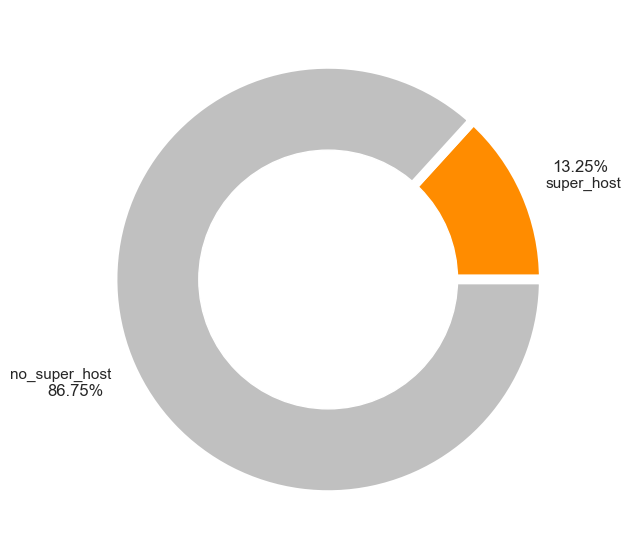

In [190]:
super_host=df.host_is_superhost.value_counts()['t']
no_super_host=df.host_is_superhost.value_counts()['f']
names=['super_host', 'no_super_host']
size=[super_host, no_super_host]
plt.pie(size, labels=names, colors=['darkorange', 'silver'],
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})
my_circle = plt.Circle((0,0), 0.6, color='white')

fig=plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\1179736641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='host_is_superhost', y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\1179736641.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


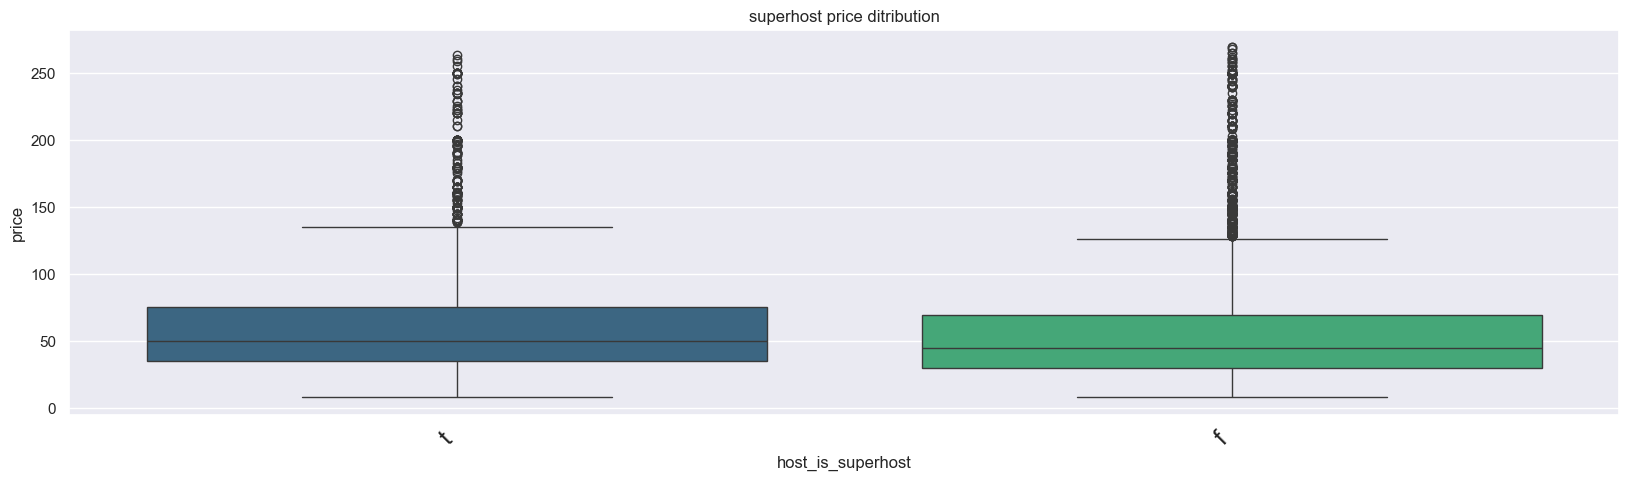

In [191]:
plt.figure(figsize=(20,5))

chart=sns.boxplot(x='host_is_superhost', y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('superhost price ditribution')
chart;

In [53]:
lat=df['latitude'].tolist()
lon=df['longitude'].tolist()
locations=list(zip(lat, lon))

map1=folium.Map(location=[52.5200, 13.4050], zoom_start=12)
FastMarkerCluster(locations).add_to(map1)
map1

In [82]:
from math import sin, cos, sqrt, atan2, radians

In [193]:
def distance(lat1, lat2, lon1, lon2):
    R=6373.0
    rlat1=radians(lat1)
    rlat2=radians(lat2)
    rlon1=radians(lon1)
    rlon2=radians(lon2)
    rdlon=rlon2-rlon1
    rdlat=rlat2-rlat1
    a=sin(rdlat/2)**2 + cos(rlat1) * cos(rlat2) * sin(rdlon/2)**2
    c=2*atan2(sqrt(a), sqrt(1-a))
    distance=R*c
    return distance

In [194]:
#top locations in berlin
toploc={"hbf":[52.525293, 13.369359],
        "txl":[52.558794, 13.288437],
        "btor":[52.516497, 13.377683],
        "museum":[52.517693, 13.402141],
        "reichstag":[52.518770, 13.376166]}
toploc=pd.DataFrame.from_dict(toploc)
toploc_trans=toploc.transpose()
toploc_trans.columns=["latitude", "longitude"]

dist=[]
for col in toploc.columns:
    df["dist_"+col]=df.apply(lambda x: distance (x.latitude, toploc[col][0], x.longitude, toploc[col][1]), axis=1)
    dist.append("dist_"+col)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22315 entries, 0 to 22551
Data columns (total 74 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22315 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host_veri

In [196]:
dist

['dist_hbf', 'dist_txl', 'dist_btor', 'dist_museum', 'dist_reichstag']

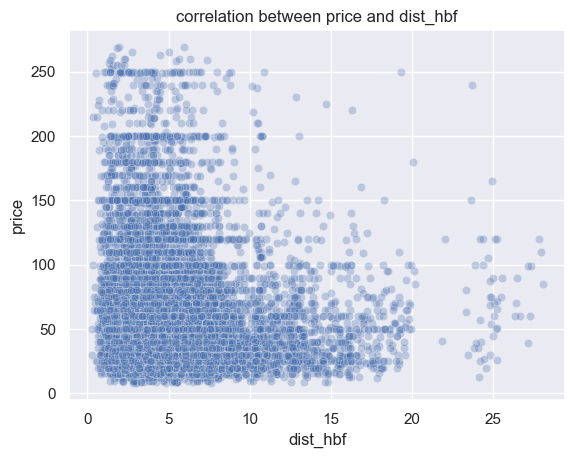

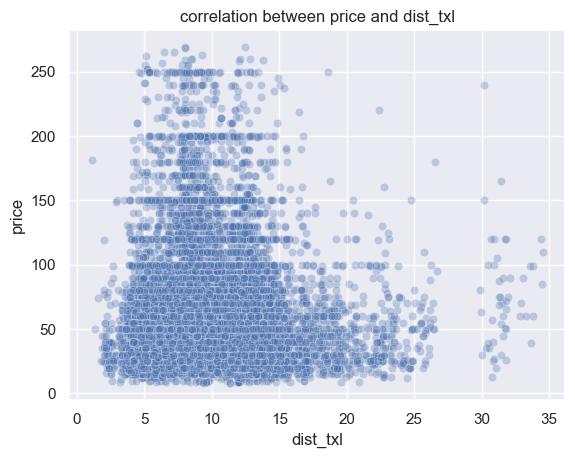

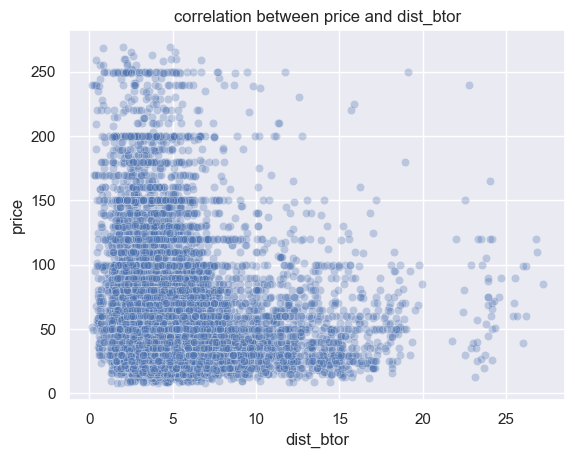

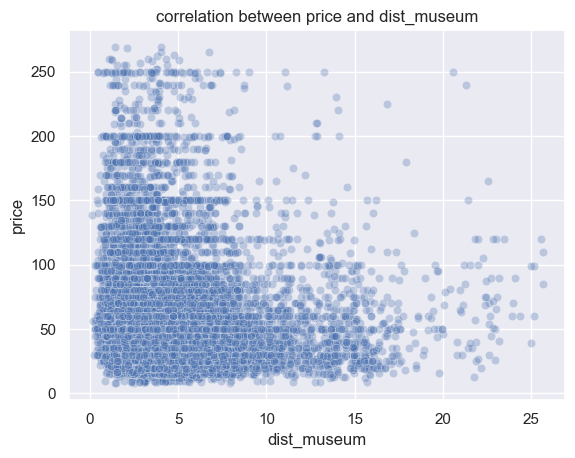

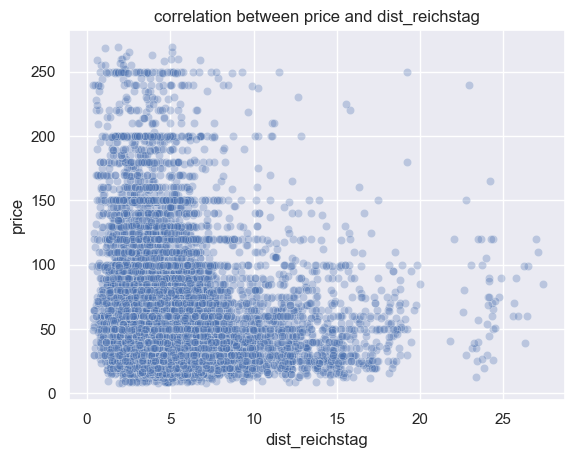

In [197]:
from scipy import stats
for distance in dist:
    sns.scatterplot(x=distance, y="price", data=df, alpha=0.3)
    plt.title("correlation between price and "+distance)
    plt.show()

In [199]:
df['dist_average']=df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag']].mean(axis=1)

In [200]:
df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag']].head()

,dist_hbf,dist_txl,dist_btor,dist_museum,dist_reichstag
0,2.470531,8.177076,2.619164,1.873802,2.503054
1,3.512827,7.935716,3.998364,3.431962,3.825405
2,3.436703,9.127423,3.394579,2.189884,3.333330
3,3.245779,7.828150,2.757640,4.159571,2.876309
4,3.677298,8.740897,3.898852,2.964838,3.780919


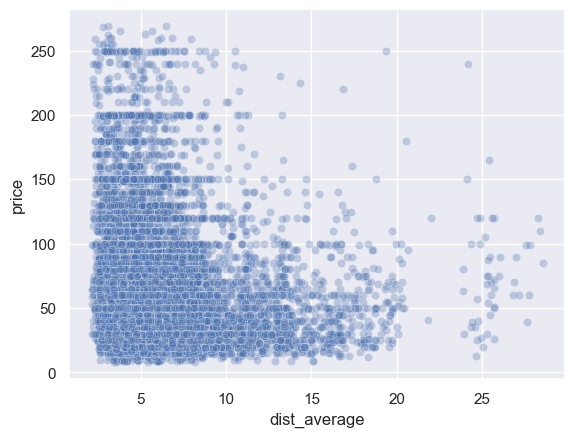

In [201]:
sns.scatterplot(x='dist_average', y="price", data=df, alpha=0.3);

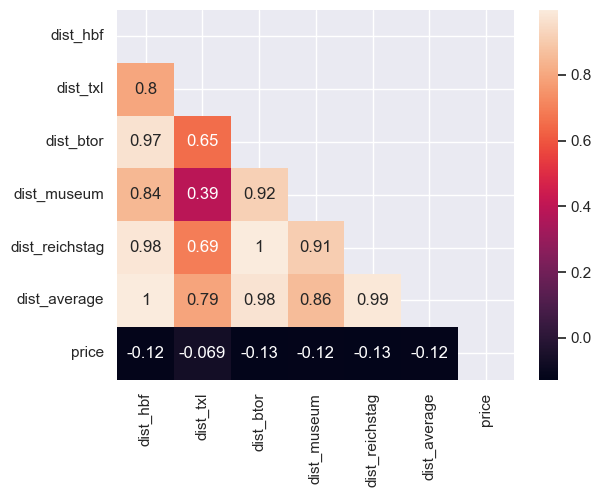

In [202]:
sns.heatmap(df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr(),
            annot=True, mask=np.triu(df[['dist_hbf','dist_txl','dist_btor','dist_museum','dist_reichstag','dist_average','price']].corr()));

In [203]:
df['amenities'].unique()

array(['{TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Family/kid friendly","Smoke detector",Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room",Bathtub,"Hot water","Bed linens","Extra pillows and blankets",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Stove,"Luggage dropoff allowed","Long term stays allowed"}',
       '{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}',
       '{Internet,Wifi,Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,"Smoke detector","Carbon monoxide detector","First aid kit","Safety card","Fire extinguisher",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace"}',
       ...,
       '{Wifi,Kitchen,Heating,Washer,"Fire extinguisher",Essentials,Iron,"Hot water"}',
       '{Wifi,"Paid parking off premises",Doorman,Elevator,Heating,

In [96]:
from collections import Counter

In [205]:
#let's identify 10 most frequently occuing amentites
amenities=Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"','')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(amenities.update)

amenities.most_common(10)

[('Wifi', 21295),
 ('Kitchen', 21135),
 ('Heating', 20993),
 ('Essentials', 20116),
 ('Washer', 18330),
 ('Hair dryer', 14708),
 ('Laptop friendly workspace', 14296),
 ('Hangers', 13728),
 ('Iron', 11042),
 ('Shampoo', 10500)]

In [206]:
df['Laptop_friendly_workspace']=df['amenities'].str.contains('Laptop friendly workspace')
df['TV']=df['amenities'].str.contains('TV')
df['Hot_Water']=df['amenities'].str.contains('Hot Water')
df['Family_friendly']=df['amenities'].str.contains('Family/kid friendly')
df['Hair_dryer']=df['amenities'].str.contains('Hair dryer')
df['Smoking_allowed']=df['amenities'].str.contains('Smoking allowed')

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22315 entries, 0 to 22551
Data columns (total 81 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22315 non-null  int64  
 1   scrape_id                         22315 non-null  float64
 2   last_scraped                      22315 non-null  int64  
 3   experiences_offered               22315 non-null  object 
 4   host_id                           22315 non-null  int64  
 5   host_name                         22290 non-null  object 
 6   host_since                        22290 non-null  object 
 7   host_location                     22201 non-null  object 
 8   host_is_superhost                 22315 non-null  object 
 9   host_neighbourhood                17280 non-null  object 
 10  host_listings_count               22290 non-null  float64
 11  host_total_listings_count         22290 non-null  float64
 12  host_veri

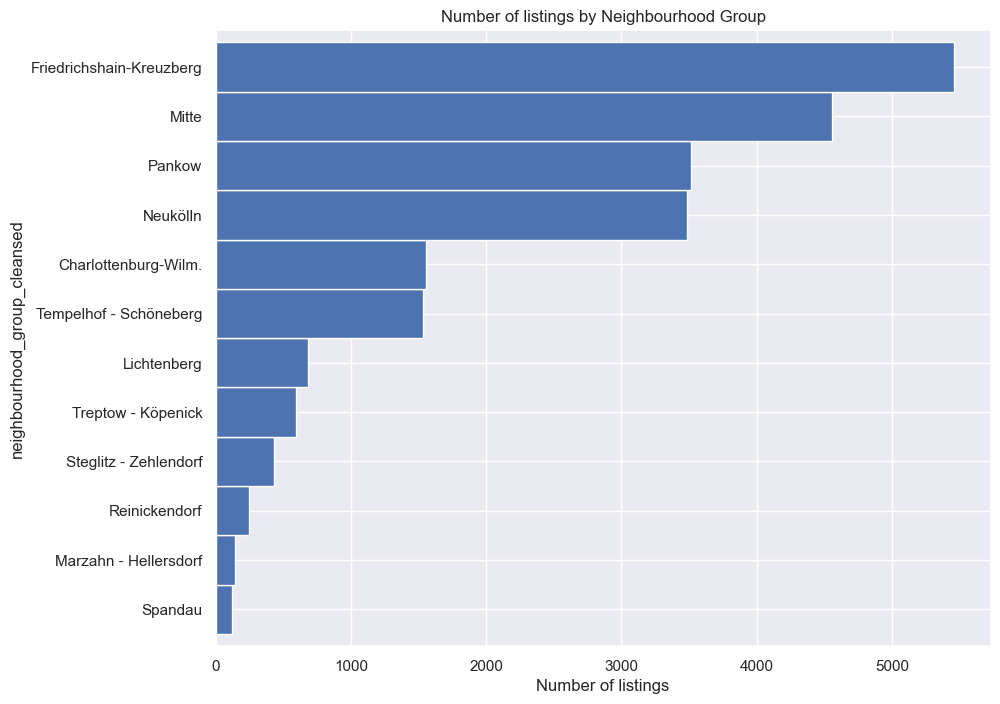

In [207]:
freq=df['neighbourhood_group_cleansed'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10,8),width=1)
plt.title("Number of listings by Neighbourhood Group")
plt.xlabel('Number of listings')
plt.show()

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\2530180177.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='neighbourhood_group_cleansed',y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\2530180177.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


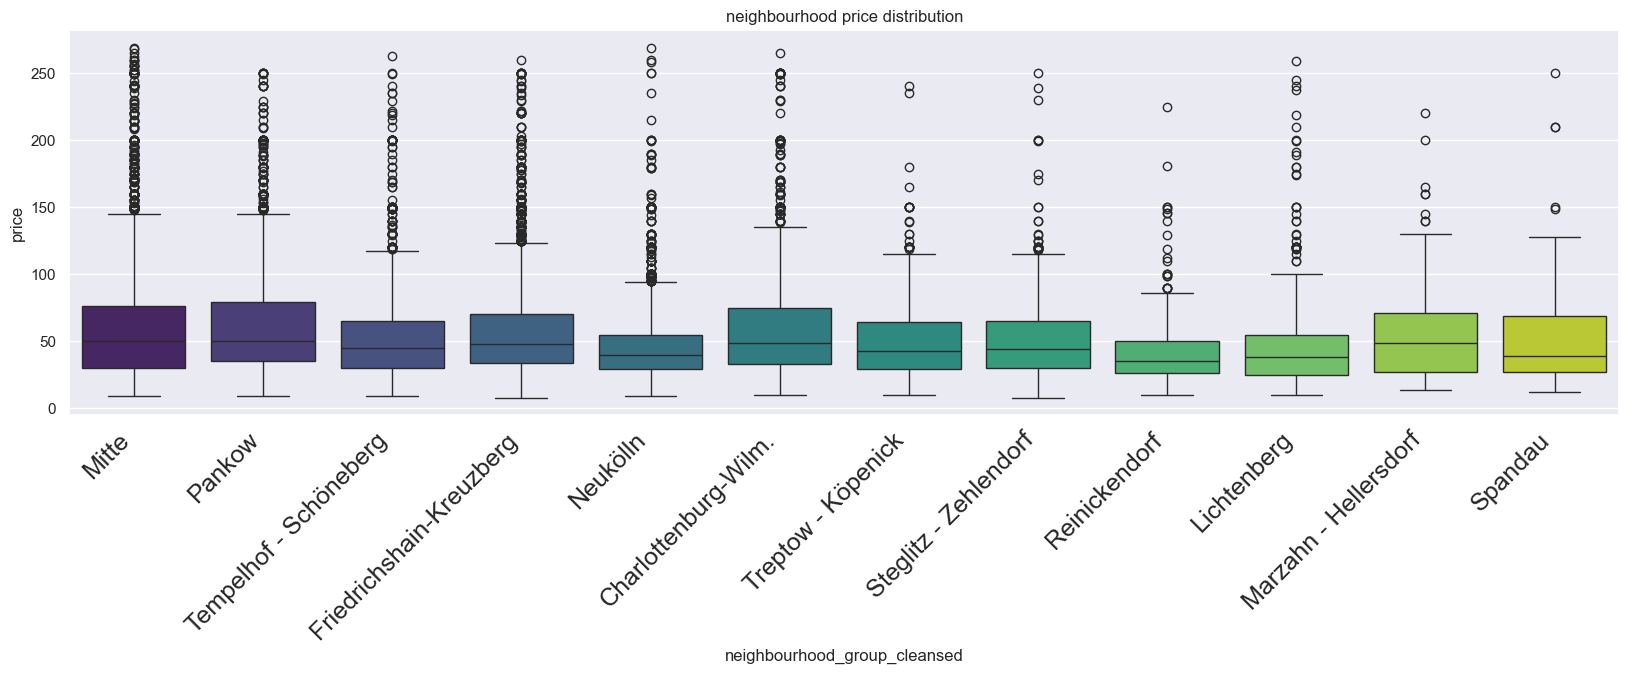

In [104]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x='neighbourhood_group_cleansed',y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('neighbourhood price distribution')
chart;


bedrooms
1.0    17087
2.0     2926
0.0     1471
3.0      666
4.0      120
5.0       18
6.0        5
8.0        2
7.0        1
9.0        1
Name: count, dtype: int64 



C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\3967834429.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='bedrooms', y='price', data=df, palette='summer');


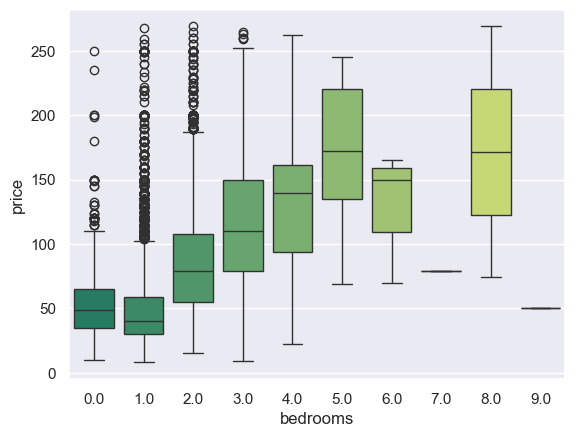

In [105]:
print(df['bedrooms'].value_counts(), '\n')

sns.boxplot(x='bedrooms', y='price', data=df, palette='summer');

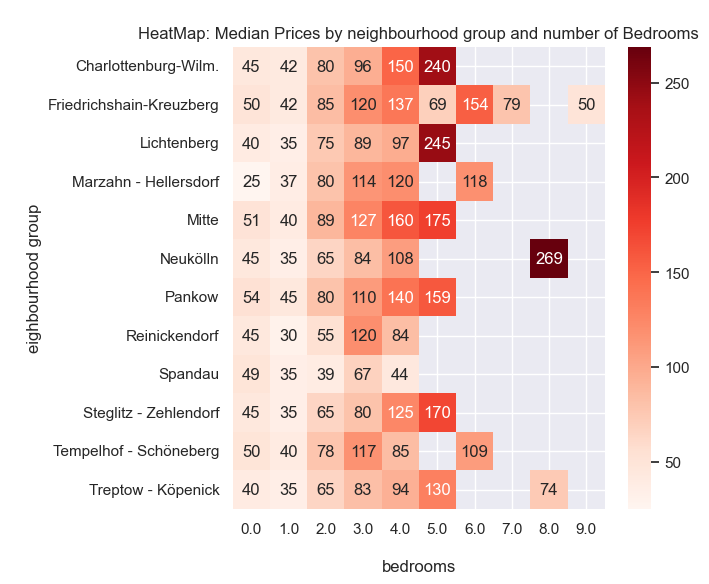

In [208]:
plt.figure(figsize=(6,6))
sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.median().unstack(),
            cmap='Reds', annot=True, fmt=".0f")
plt.xlabel("\nbedrooms", fontsize=12)
plt.ylabel("\neighbourhood group", fontsize=12)
plt.title("\nHeatMap: Median Prices by neighbourhood group and number of Bedrooms", fontsize=12)

plt.show()

In [109]:
df['cancellation_policy'].value_counts()

cancellation_policy
flexible                       9025
moderate                       7045
strict_14_with_grace_period    6188
super_strict_30                  48
super_strict_60                   9
Name: count, dtype: int64

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\3652519989.py:1: FutureWarning: The provided callable <function median at 0x000002269D5774C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df_grouped=pd.DataFrame(df.groupby(['cancellation_policy'])['price'].agg(np.median))


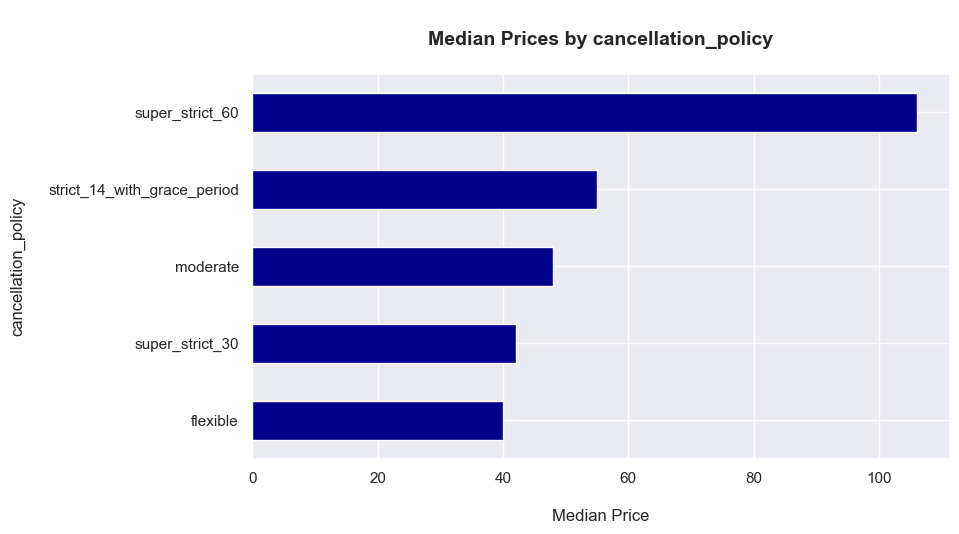

In [111]:
df_grouped=pd.DataFrame(df.groupby(['cancellation_policy'])['price'].agg(np.median))
df_grouped.reset_index(inplace=True)

df_grouped.sort_values(by=['price'], ascending=True)\
    .plot(kind='barh', x='cancellation_policy', y='price', 
          figsize=(9,5), legend=False, color='darkblue')
plt.xlabel('\nMedian Price', fontsize=12)
plt.ylabel('cancellation_policy\n', fontsize=12)
plt.title('\nMedian Prices by cancellation_policy\n',fontsize=14, fontweight='bold');

In [113]:
df.property_type.unique()

array(['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House',
       'Serviced apartment', 'Townhouse', 'Boutique hotel',
       'Bed and breakfast', 'Bungalow', 'Boat', 'Guest suite', 'Other',
       'Island', 'Hostel', 'Train', 'Camper/RV', 'Houseboat', 'Cabin',
       'Cottage', 'Tiny house', 'Chalet', 'Castle', 'Villa', 'Aparthotel',
       'Hotel', 'Tipi', 'Resort', 'In-law', 'Cave', 'Barn',
       'Pension (South Korea)', 'Casa particular (Cuba)'], dtype=object)

In [114]:
df.property_type.value_counts()

property_type
Apartment                 20098
Condominium                 606
Loft                        439
House                       387
Serviced apartment          150
Hostel                      123
Townhouse                    95
Guest suite                  74
Bed and breakfast            64
Guesthouse                   56
Other                        44
Boutique hotel               36
Hotel                        31
Bungalow                     19
Boat                         14
Tiny house                   12
Camper/RV                    11
Villa                        10
Houseboat                     8
Pension (South Korea)         7
Cabin                         6
Aparthotel                    6
Cottage                       4
Resort                        3
Train                         2
Castle                        2
Casa particular (Cuba)        2
Chalet                        1
Island                        1
Tipi                          1
In-law                    

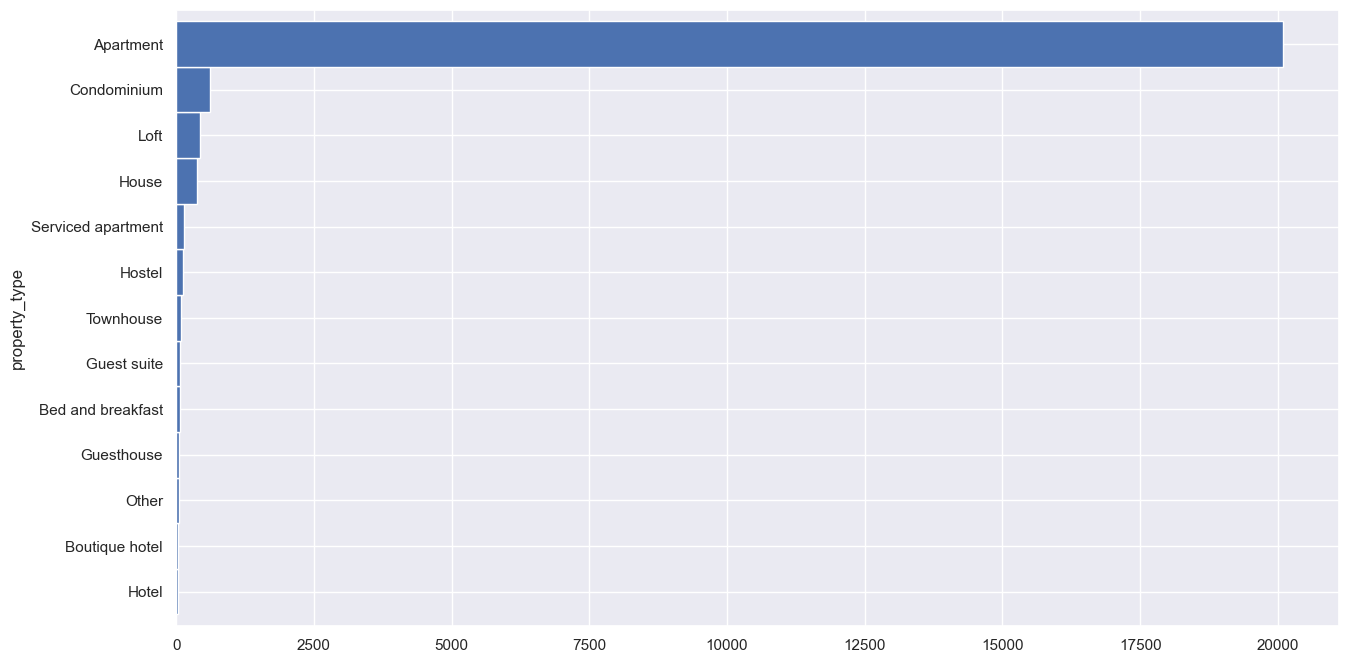

In [117]:
freq=df['property_type'].value_counts().sort_values(ascending=True)
freq=freq[freq>20] #eliminate types less than 20 counts
freq.plot.barh(figsize=(15,8),width=1)
#plt.xscale('log')
plt.show()

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\4240085317.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='property_type',y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\4240085317.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


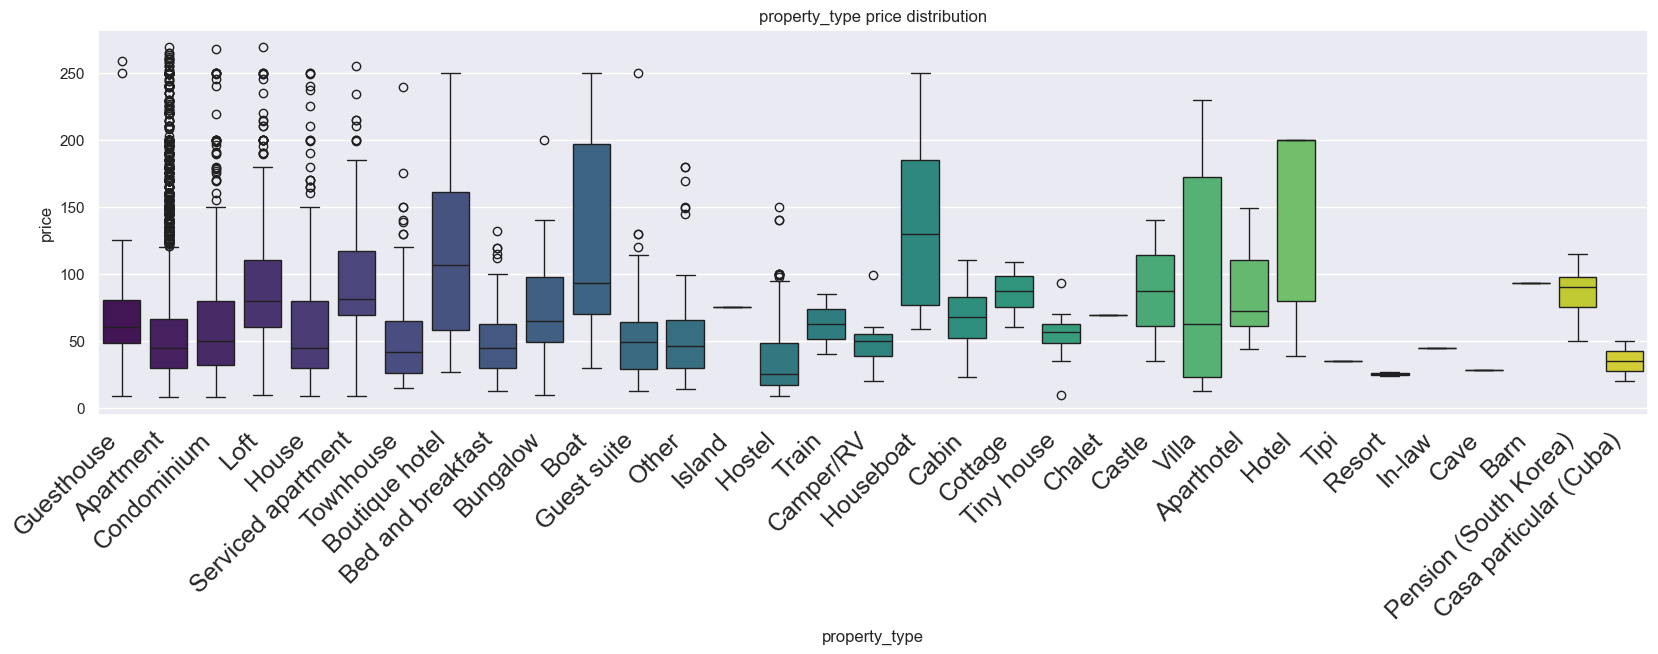

In [118]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x='property_type',y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('property_type price distribution')
chart;

In [209]:
df=df[(df.property_type=='Apartment')]

In [210]:
df.shape

(20098, 81)

In [211]:
df.host_has_profile_pic.unique()

array(['t', nan, 'f'], dtype=object)

In [123]:
df.host_has_profile_pic.value_counts()

host_has_profile_pic
t    20024
f       51
Name: count, dtype: int64

In [124]:
df.host_identity_verified.unique()

array(['t', 'f', nan], dtype=object)

In [128]:
freq=df['host_identity_verified'].value_counts().sort_values(ascending=True)
freq

host_identity_verified
t     7886
f    12189
Name: count, dtype: int64

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\3811775511.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='host_identity_verified',y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\3811775511.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


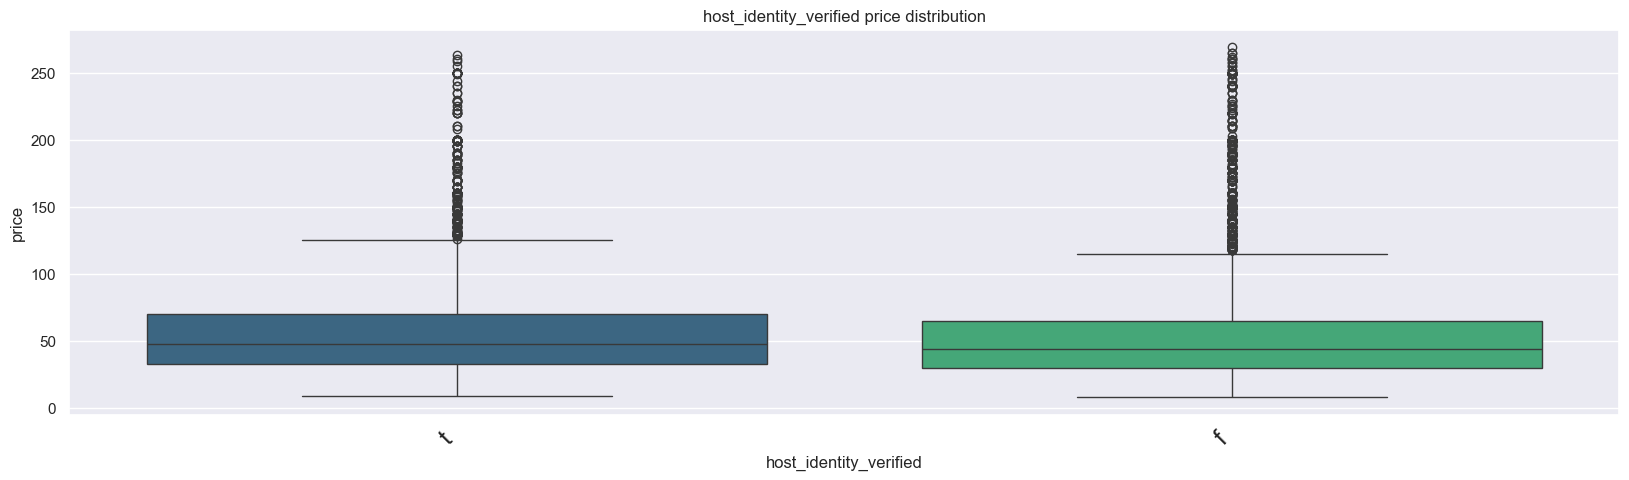

In [129]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x='host_identity_verified',y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('host_identity_verified price distribution')
chart;

In [130]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

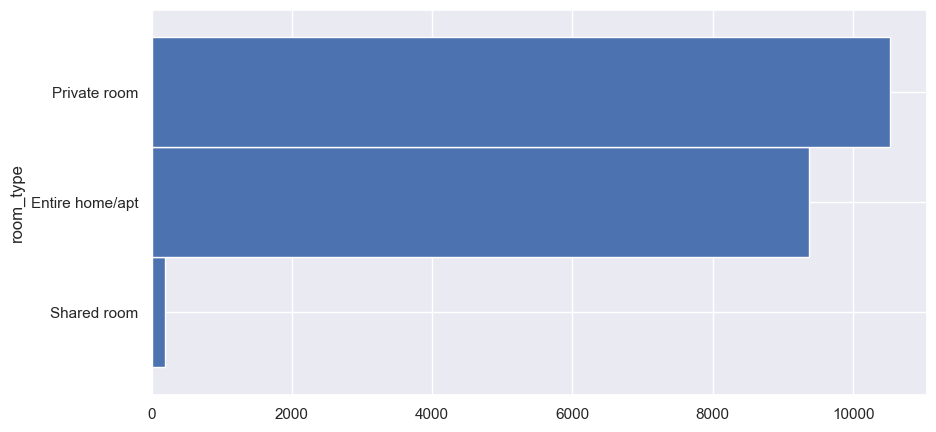

In [132]:
freq=df['room_type'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10,5), width=1)
plt.show()

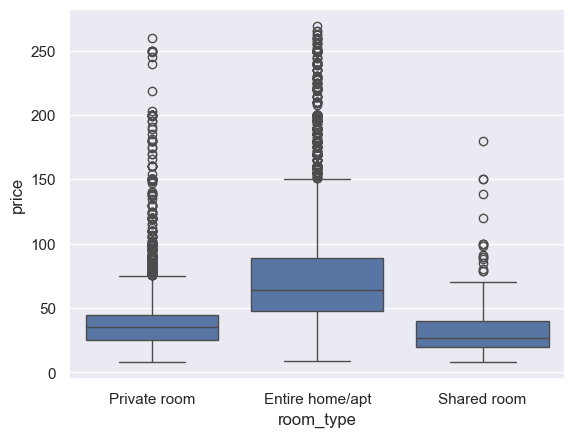

In [134]:
sns.boxplot(x="room_type", y="price", data=df);

In [135]:
df.accommodates.value_counts().sort_index()

accommodates
1      2495
2     11159
3      2249
4      2805
5       578
6       538
7        88
8       104
9        27
10       25
11       10
12       17
13        1
14        1
15        1
Name: count, dtype: int64

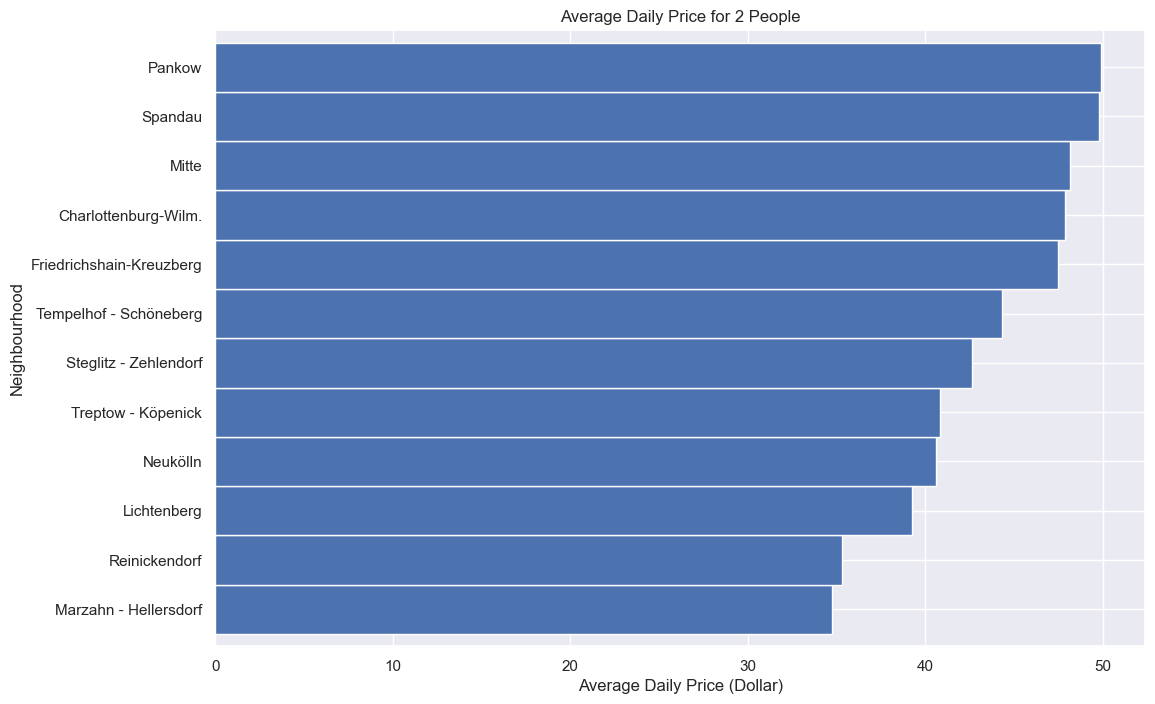

In [136]:
freq=df[df['accommodates']==2]
freq=freq.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True)
freq.plot.barh(figsize=(12,8),width=1)
plt.title("Average Daily Price for 2 People")
plt.xlabel('Average Daily Price (Dollar)')
plt.ylabel('Neighbourhood')
plt.show()

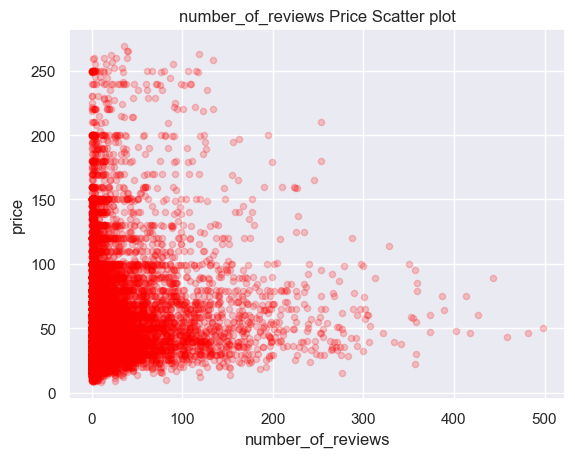

In [137]:
df.plot(kind='scatter', x='number_of_reviews', y='price', alpha=0.2, color='red')
plt.title("number_of_reviews Price Scatter plot")
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.show()

In [138]:
df['experiences_offered'].unique()

array(['none'], dtype=object)

In [139]:
df['host_since']

1        16-09-2008
2        19-10-2008
3        07-11-2008
4        16-05-2009
5        25-08-2009
            ...    
22545    02-01-2018
22546    15-09-2014
22547    02-08-2016
22548    17-04-2016
22551    09-03-2018
Name: host_since, Length: 20098, dtype: object

In [141]:
pd.DatetimeIndex(df['host_since'])

DatetimeIndex(['2008-09-16', '2008-10-19', '2008-07-11', '2009-05-16',
               '2009-08-25', '2009-11-18', '2009-03-12', '2009-12-20',
               '2010-08-01', '2009-12-20',
               ...
               '2015-01-21', '2014-05-09', '2018-06-11', '2017-02-17',
               '2013-10-20', '2018-02-01', '2014-09-15', '2016-02-08',
               '2016-04-17', '2018-09-03'],
              dtype='datetime64[ns]', name='host_since', length=20098, freq=None)

In [212]:
df['year']=pd.DatetimeIndex(df['host_since']).year
df['year']

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\3647634653.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=pd.DatetimeIndex(df['host_since']).year


1        2008.0
2        2008.0
3        2008.0
4        2009.0
5        2009.0
          ...  
22545    2018.0
22546    2014.0
22547    2016.0
22548    2016.0
22551    2018.0
Name: year, Length: 20098, dtype: float64

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\2823867609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='year',y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\2823867609.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


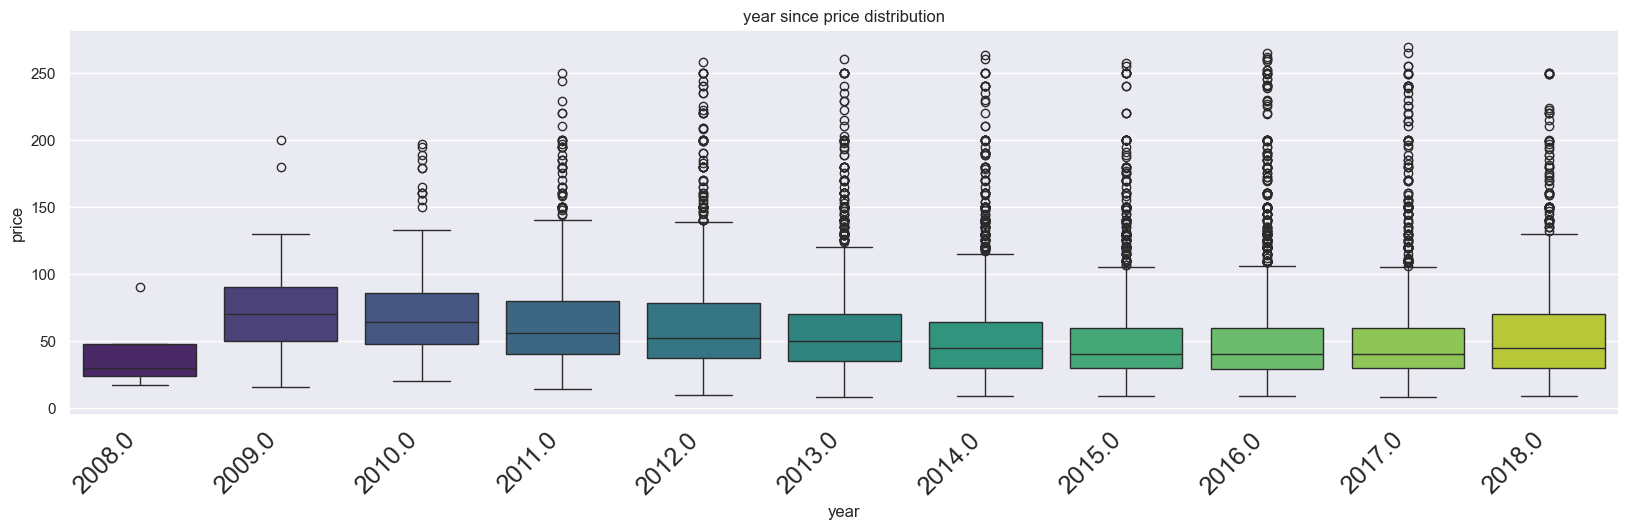

In [213]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x='year',y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('year since price distribution')
chart;

In [214]:
fred=df['is_location_exact'].value_counts().sort_values(ascending=True)

In [215]:
df[['host_total_listings_count', 'host_listings_count', 'calculated_host_listings_count']].corr()

,host_total_listings_count,host_listings_count,calculated_host_listings_count
host_total_listings_count,1.000000,1.000000,0.171816
host_listings_count,1.000000,1.000000,0.171816
calculated_host_listings_count,0.171816,0.171816,1.000000


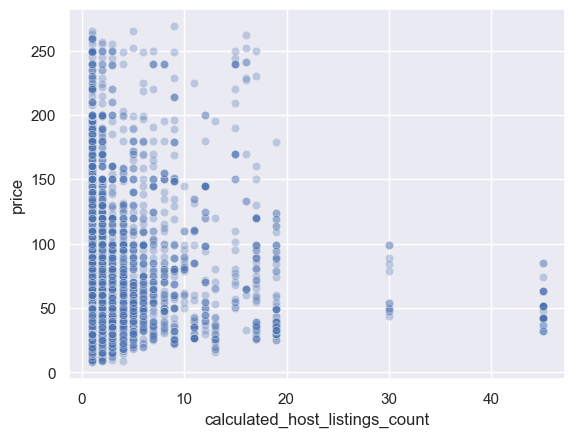

In [146]:
sns.scatterplot(x='calculated_host_listings_count', y='price', data=df, alpha=0.3);

In [147]:
df['bathrooms'].value_counts()

bathrooms
1.0    17980
1.5      973
2.0      942
0.5       88
2.5       39
0.0       22
3.0       13
4.0        5
7.5        2
8.0        2
3.5        1
7.0        1
Name: count, dtype: int64

In [148]:
df['bedrooms'].value_counts()

bedrooms
1.0    15549
2.0     2615
0.0     1270
3.0      556
4.0       83
5.0       11
6.0        3
Name: count, dtype: int64

In [149]:
df['beds'].value_counts()

beds
1.0     13190
2.0      4715
3.0      1153
4.0       588
5.0       189
6.0       124
7.0        38
8.0        34
0.0        20
9.0        10
10.0        7
12.0        3
15.0        2
11.0        1
Name: count, dtype: int64

In [150]:
df['bed_type'].value_counts()

bed_type
Real Bed         19390
Pull-out Sofa      412
Futon              212
Couch               63
Airbed              21
Name: count, dtype: int64

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\4222987627.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='bed_type',y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\4222987627.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


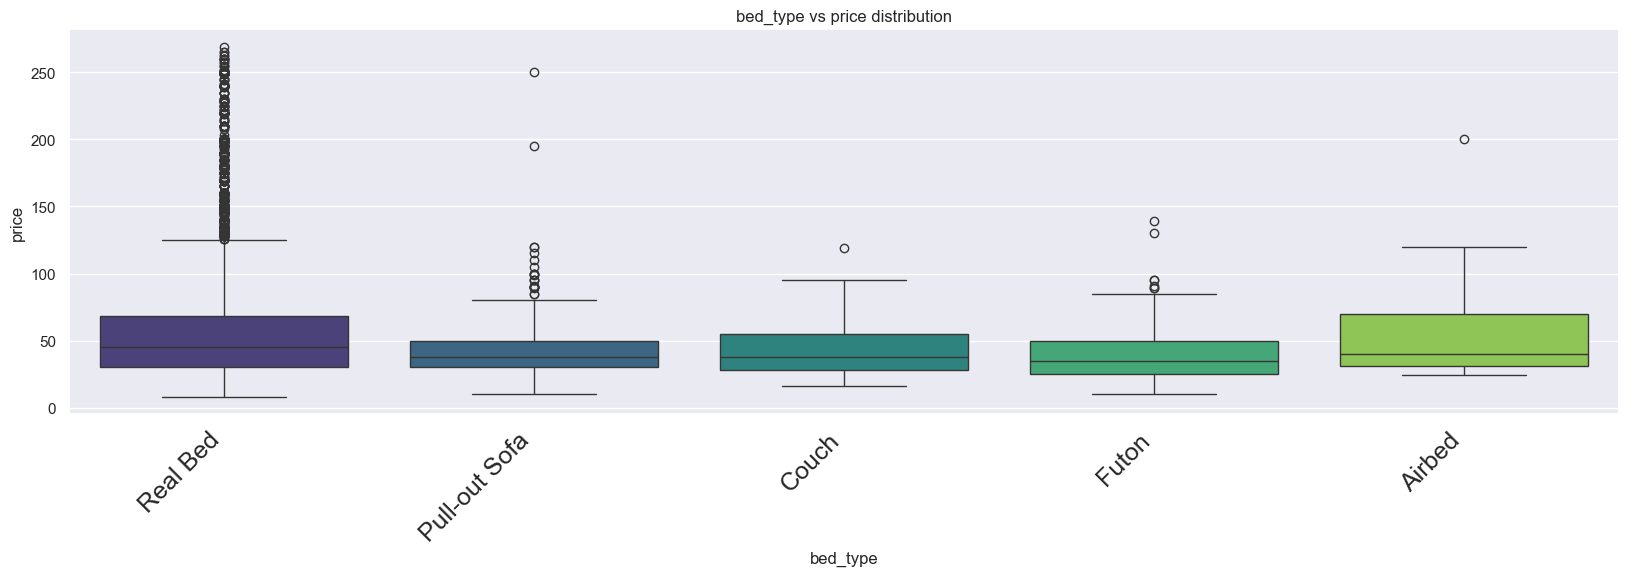

In [151]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x='bed_type',y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('bed_type vs price distribution')
chart;

In [152]:
df['guests_included'].value_counts()

guests_included
1     15754
2      3486
4       411
3       316
6        58
5        46
8         7
16        5
7         5
10        3
9         3
14        1
12        1
11        1
13        1
Name: count, dtype: int64

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\1474578393.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart=sns.boxplot(x='guests_included',y='price', data=df, palette='viridis')
C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\1474578393.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)


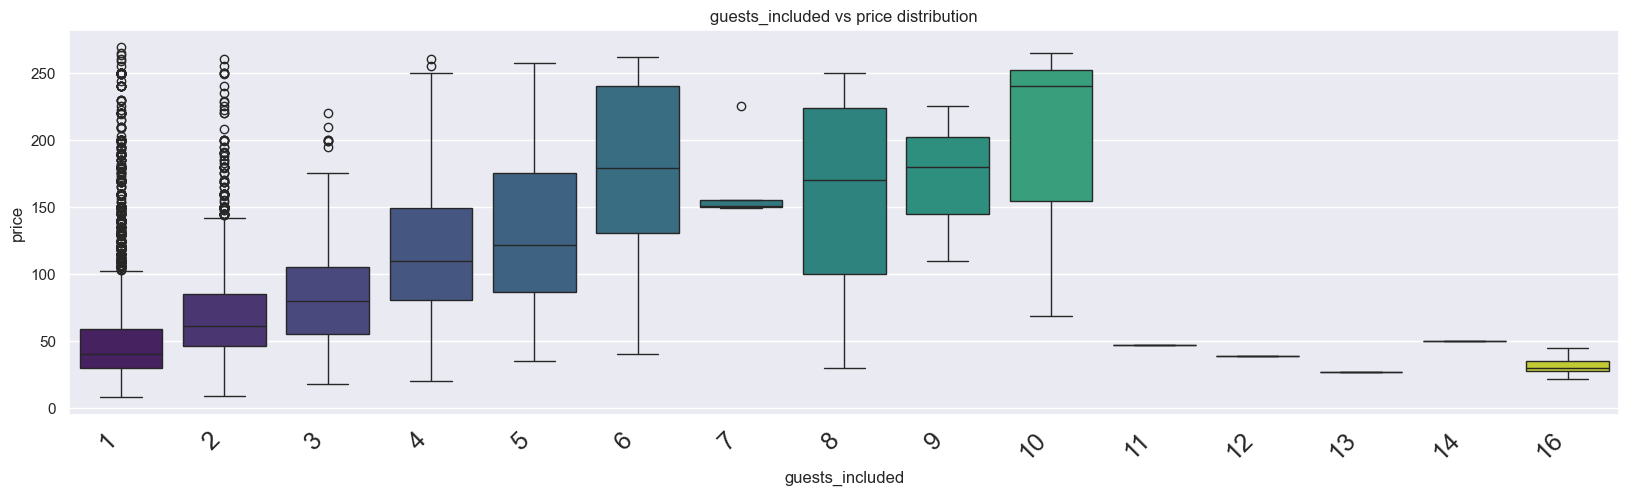

In [153]:
plt.figure(figsize=(20,5))
chart=sns.boxplot(x='guests_included',y='price', data=df, palette='viridis')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('guests_included vs price distribution')
chart;

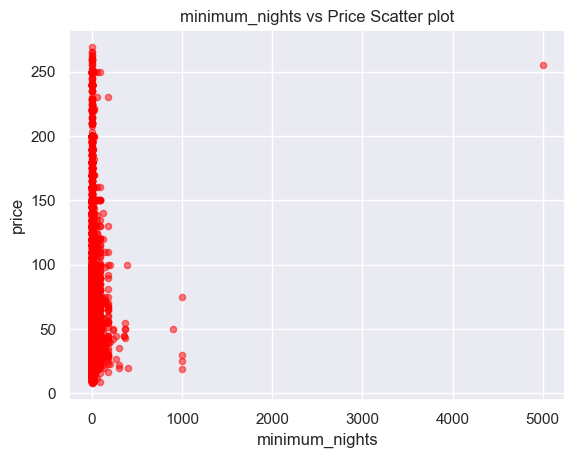

In [154]:
df.plot(kind='scatter', x='minimum_nights', y='price', alpha=0.5, color='red')
plt.title("minimum_nights vs Price Scatter plot")
plt.xlabel('minimum_nights')
plt.ylabel('price')
plt.show()

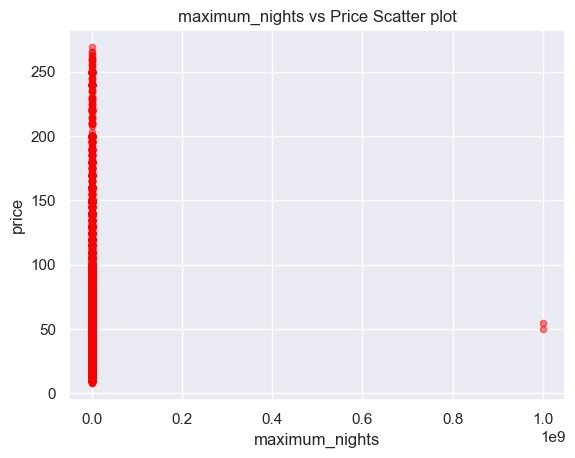

In [155]:
df.plot(kind='scatter', x='maximum_nights', y='price', alpha=0.5, color='red')
plt.title("maximum_nights vs Price Scatter plot")
plt.xlabel('maximum_nights')
plt.ylabel('price')
plt.show()

In [156]:
df['has_availability'].value_counts()

has_availability
t    20098
Name: count, dtype: int64

In [157]:
df['availability_30'].value_counts()

availability_30
0     13444
6       446
1       413
4       386
5       346
29      332
2       318
3       313
7       279
30      257
8       257
9       230
12      196
14      196
11      195
23      191
10      187
27      187
28      186
15      173
13      164
20      156
17      156
16      156
18      155
19      146
25      144
22      140
21      135
24      115
26       99
Name: count, dtype: int64

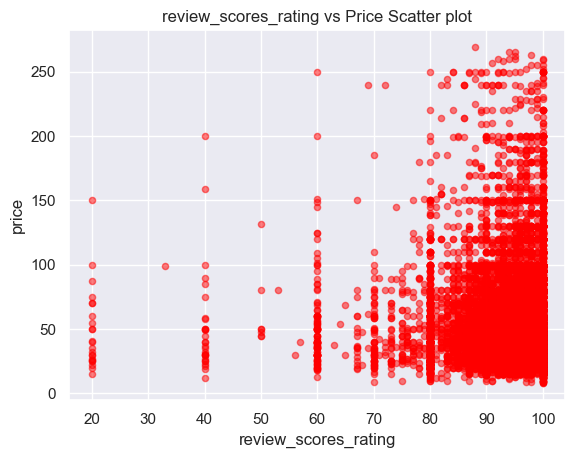

In [158]:
df.plot(kind='scatter', x='review_scores_rating', y='price', alpha=0.5, color='red')
plt.title("review_scores_rating vs Price Scatter plot")
plt.xlabel('review_scores_rating')
plt.ylabel('price')
plt.show()

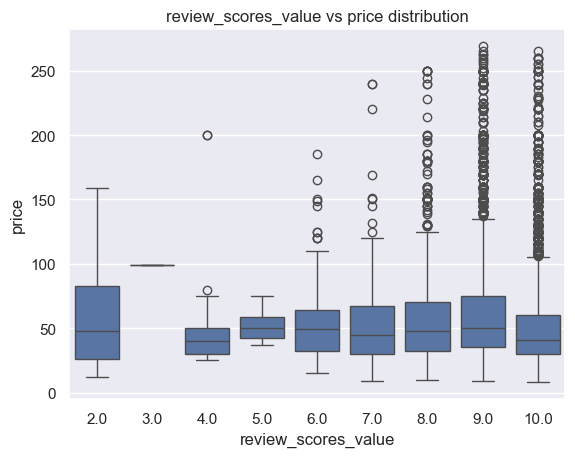

In [159]:
sns.boxplot(x='review_scores_value',y='price', data=df)
plt.title('review_scores_value vs price distribution')
plt.show()

In [162]:
df['instant_bookable'].value_counts()

instant_bookable
f    13988
t     6110
Name: count, dtype: int64

In [163]:
df['requires_license'].value_counts()

requires_license
t    20094
f        4
Name: count, dtype: int64

In [164]:
df['is_business_travel_ready'].value_counts()

is_business_travel_ready
f    20098
Name: count, dtype: int64

In [165]:
df['require_guest_phone_verification'].value_counts()

require_guest_phone_verification
f    19879
t      219
Name: count, dtype: int64

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20098 entries, 1 to 22551
Data columns (total 82 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                20098 non-null  int64  
 1   scrape_id                         20098 non-null  float64
 2   last_scraped                      20098 non-null  int64  
 3   experiences_offered               20098 non-null  object 
 4   host_id                           20098 non-null  int64  
 5   host_name                         20075 non-null  object 
 6   host_since                        20075 non-null  object 
 7   host_location                     19994 non-null  object 
 8   host_is_superhost                 20098 non-null  object 
 9   host_neighbourhood                15452 non-null  object 
 10  host_listings_count               20075 non-null  float64
 11  host_total_listings_count         20075 non-null  float64
 12  host_veri

In [216]:
df['year']=df['year'].astype(object)

C:\Users\harikrishnan.m\AppData\Local\Temp\ipykernel_45228\3912422246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year']=df['year'].astype(object)


In [224]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 20098 entries, 1 to 22551
Data columns (total 112 columns):
 #    Column                                                 Non-Null Count  Dtype  
---   ------                                                 --------------  -----  
 0    id                                                     20098 non-null  int64  
 1    scrape_id                                              20098 non-null  float64
 2    last_scraped                                           20098 non-null  int64  
 3    experiences_offered                                    20098 non-null  object 
 4    host_id                                                20098 non-null  int64  
 5    host_name                                              20075 non-null  object 
 6    host_since                                             20075 non-null  object 
 7    host_location                                          19994 non-null  object 
 8    host_neighbourhood                     

In [218]:
df=pd.get_dummies(df, columns=['host_is_superhost','host_identity_verified','neighbourhood_group_cleansed', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable', 'cancellation_policy', 'Laptop_friendly_workspace','TV','Hot_Water','Family_friendly','Hair_dryer', 'Smoking_allowed', 'year'])

In [221]:
print(df.columns)

Index(['id', 'scrape_id', 'last_scraped', 'experiences_offered', 'host_id',
       'host_name', 'host_since', 'host_location', 'host_neighbourhood',
       'host_listings_count',
       ...
       'Laptop_friendly_workspace_True', 'TV_False', 'TV_True',
       'Hot_Water_False', 'Family_friendly_False', 'Family_friendly_True',
       'Hair_dryer_False', 'Hair_dryer_True', 'Smoking_allowed_False',
       'Smoking_allowed_True'],
      dtype='object', length=112)


In [ ]:
df['neighbourhood_group_cleansed_'

In [222]:
df.rename(columns={'neighbourhood_group_cleansed_Marzahn - Hellersdorf':'neighbourhood_group_cleansed_Marzahn_Hellersdorf','neighbourhood_group_cleansed_Steglitz - Zehlendorf':'neighbourhood_group_cleansed_Steglitz_Zehlendorf','neighbourhood_group_cleansed_Tempelhof - Schöneberg':'neighbourhood_group_cleansed_Tempelhof_Schöneberg','neighbourhood_group_cleansed_Treptow - Köpenick':'neighbourhood_group_cleansed_Treptow_Köpenick','bed_type_Pull-out Sofa':'bed_type_Pull-out Sofa','bed_type_Real Bed':'bed_type_Real_Bed','room_type_Private room':'room_type_Private_room','room_type_shared room':'room_type_shared_room','year_2009.0':'year_2009','year_2010.0':'year_2010','year_2011.0':'year_2011','year_2012.0':'year_2012','year_2013.0':'year_2013','year_2014.0':'year_2014','year_2015.0':'year_2015','year_2016.0':'year_2016','year_2017.0':'year_2017','year_2018.0':'year_2018'})

,id,scrape_id,last_scraped,experiences_offered,host_id,host_name,host_since,host_location,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,accommodates,bathrooms,bedrooms,beds,amenities,price,weekly_price,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,is_business_travel_ready,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,dist_hbf,dist_txl,dist_btor,dist_museum,dist_reichstag,dist_average,year,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_group_cleansed_Charlottenburg-Wilm.,neighbourhood_group_cleansed_Friedrichshain-Kreuzberg,neighbourhood_group_cleansed_Lichtenberg,neighbourhood_group_cleansed_Marzahn_Hellersdorf,neighbourhood_group_cleansed_Mitte,neighbourhood_group_cleansed_Neukölln,neighbourhood_group_cleansed_Pankow,neighbourhood_group_cleansed_Reinickendorf,neighbourhood_group_cleansed_Spandau,neighbourhood_group_cleansed_Steglitz_Zehlendorf,neighbourhood_group_cleansed_Tempelhof_Schöneberg,neighbourhood_group_cleansed_Treptow_Köpenick,is_location_exact_f,is_location_exact_t,property_type_Apartment,room_type_Entire home/apt,room_type_Private_room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real_Bed,instant_bookable_f,instant_bookable_t,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,Laptop_friendly_workspace_False,Laptop_friendly_workspace_True,TV_False,TV_True,Hot_Water_False,Family_friendly_False,Family_friendly_True,Hair_dryer_False,Hair_dryer_True,Smoking_allowed_False,Smoking_allowed_True
1,2695,2.018110e+13,43411,none,2986,Michael,16-09-2008,"Berlin, Berlin, Germany",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"Berlin, Berlin, Germany",NaN,Prenzlauer Berg Nordwest,Berlin,Berlin,10437,Berlin,"Berlin, Germany",DE,Germany,52.548513,13.404553,2,1.0,1.0,1.0,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17.0,NaN,0,1,$0.00,2,40,7 weeks ago,t,0,0,0,0,43411,6,43285.0,43374.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,f,f,1,1.42,3.512827,7.935716,3.998364,3.431962,3.825405,4.540855,2008.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,False
2,3176,2.018110e+13,43411,none,3718,Britta,19-10-2008,"Coledale, New South Wales, Australia",Prenzlauer Berg,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'man...",t,"Berlin, Berlin, Germany",Prenzlauer Berg,Prenzlauer Berg Südwest,Berlin,Berlin,10405,Berlin,"Berlin, Germany",DE,Germany,52.534996,13.417579,4,1.0,1.0,2.0,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,$520.00,50,2,$20.00,62,1125,a week ago,t,0,0,0,220,43411,143,39984.0,42814.0,92.0,9.0,9.0,9.0,9.0,10.0,9.0,t,f,f,f,1,1.25,3.436703,9.127423,3.394579,2.189884,3.333330,4.296384,2008.0,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,True,True,False,True,False,True,False,True,True,False
3,3309,2.018110e+13,43411,none,4108,Jana,07-11-2008,"Berlin, Berlin, Germany",Schöneberg,1.0,1.0,"['e

In [ ]:
df_new=df[['host_total_listings_count','accommodates','guests_included','availability_30','availability_60',
        'availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy',
           'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location',
           'review_scores_value','calculated_host_listings_count','dist_average','bathrooms','bedrooms',
           '','','',